# **Results**

### Basic setup:

In [106]:
# magics
%load_ext autoreload
%reload_ext autoreload

%autoreload 2

# load general packages
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

# load modules
from model_vfi import model_bufferstock

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [107]:
model = model_bufferstock()

In [108]:
sol = model.sol
par = model.par

model.setup()
model.create_grids()

In [109]:
par.T = 5
par.N = 40          # Number of points in grids
par.w_max = 4.0     # Maximum cash on hand
par.n_max = 2.0

model.solve()

No handles with labels found to put in legend.


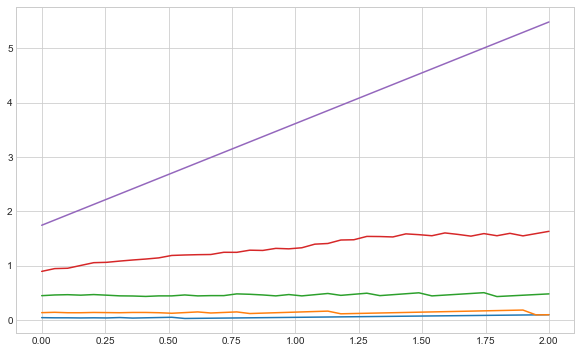

In [110]:
fig = plt.figure(figsize=(10,6))

ax = fig.add_subplot(1,1,1)

for t in range(par.T):
    plt.plot(sol.grid_w[t,:], sol.c[t,5,:])

plt.legend()
plt.show()

No handles with labels found to put in legend.


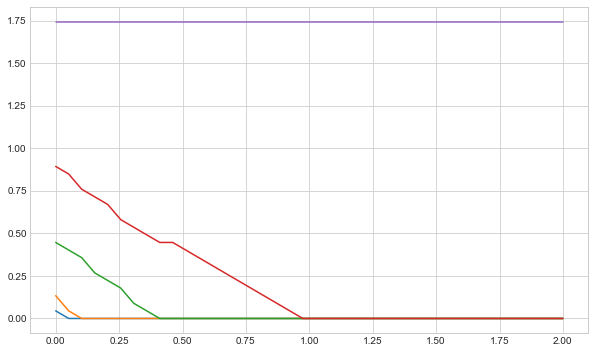

In [111]:
fig = plt.figure(figsize=(10,6))

ax = fig.add_subplot(1,1,1)

for t in range(par.T):
    plt.plot(sol.grid_w[t,:], sol.d[t,5,:])

plt.legend()
plt.show()

No handles with labels found to put in legend.


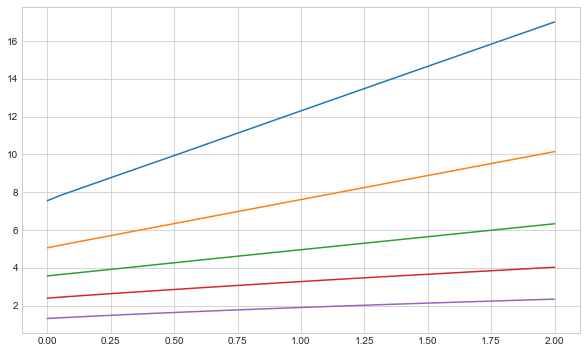

In [112]:
fig = plt.figure(figsize=(10,6))

ax = fig.add_subplot(1,1,1)

for t in range(par.T):
    plt.plot(sol.grid_w[t,:], sol.v[t,5,])

plt.legend()
plt.show()

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact


fig = plt.figure(figsize=(10, 6))

def update_plot(t):
    # Create a figure and a 3D subplot
    fig = plt.figure(figsize=(20, 7))
    ax1 = fig.add_subplot(131, projection='3d')

    # Create grid coordinates from x and y
    n, w = np.meshgrid(sol.grid_n[t, :], sol.grid_w[t, :])

    # Plot the surface
    ax1.plot_surface(n, w, sol.c[t, :, :], cmap='viridis')

    # Invert the x-axis
    ax1.set_xlim(ax1.get_xlim()[::-1])
    ax1.set_ylim(ax1.get_ylim()[::-1])

    # Set labels and title
    ax1.set_xlabel('w')
    ax1.set_ylabel('n')
    ax1.set_zlabel('c')
    ax1.set_title('Consumption')



    ax2 = fig.add_subplot(132, projection='3d')

    n, w = np.meshgrid(sol.grid_n[t, :], sol.grid_w[t, :])

    ax2.plot_surface(n, w, sol.v[t, :, :], cmap='viridis')

    ax2.set_xlim(ax2.get_xlim()[::-1])
    ax2.set_ylim(ax2.get_ylim()[::-1])

    ax2.set_xlabel('w')
    ax2.set_ylabel('n')
    ax2.set_zlabel('v')
    ax2.set_title('Utility')



    ax3 = fig.add_subplot(133, projection='3d')

    w, n = np.meshgrid(sol.grid_n[t, :], sol.grid_w[t, :])

    ax3.plot_surface(w, n, sol.d[t, :, :], cmap='viridis')

    ax3.set_xlim(ax3.get_xlim()[::-1])
    ax3.set_ylim(ax3.get_ylim()[::-1])

    ax3.set_xlabel('w')
    ax3.set_ylabel('n')
    ax3.set_zlabel('d')
    ax3.set_title('Debt')

    plt.subplots_adjust(wspace=0.2)


    plt.show()

# Create the interactive slider
interact(update_plot, t=(1, 4, 1))

<Figure size 720x432 with 0 Axes>

interactive(children=(IntSlider(value=2, description='t', max=4, min=1), Output()), _dom_classes=('widget-inte…

<function __main__.update_plot(t)>

In [116]:
import tools

par.simN = 100
par.w_ini = 1
par.n_ini = 1

shape = (par.T, par.simN)

sim.d = np.nan +np.zeros(shape)
sim.c = np.nan +np.zeros(shape)

sim.w = par.w_ini*np.ones(shape)
sim.n = par.n_ini +np.zeros(shape)

par.Nshocks = par.w.size
shocki = np.random.choice(par.Nshocks,(shape),replace=True,p=par.w) #draw values between 0 and Nshocks-1, with probability w
sim.psi = par.psi_vec[shocki] #Draw shocks from quadrature points
sim.xi = par.xi_vec[shocki] #Draw shocks from quadrature points


for t in range(par.T):

    sim.c[t,:] = tools.interp_2d_vec(sol.grid_n[t,:], sol.grid_w[t,:], sol.c[t,:,:], sim.w[t,:], sim.n[t,:])
    sim.d[t,:] = tools.interp_2d_vec(sol.grid_n[t,:], sol.grid_w[t,:], sol.d[t,:,:], sim.w[t,:], sim.n[t,:])

    if t < par.T-1:
        interest = par.r_d * (sim.n[t,:] + sim.d[t,:])
        installment = par.lambdaa * (sim.n[t,:] + sim.d[t,:])
        sim.n[t+1,:] = sim.n[t,:] + sim.d[t,:]
        sim.w[t+1,:] = (sim.w[t,:] + sim.d[t,:] - sim.c[t,:] - installment - interest)*sim.psi[t,:] + sim.xi[t,:]

In [117]:
mean_c = np.mean(sim.c, axis=1)
mean_c

array([0.16313491, 0.76789158, 0.85526445, 0.85904574, 0.84669194])

In [118]:
mean_d = np.mean(sim.d, axis=1)
mean_d


array([ 0.        ,  0.        ,  0.        ,  0.        , -0.10220537])

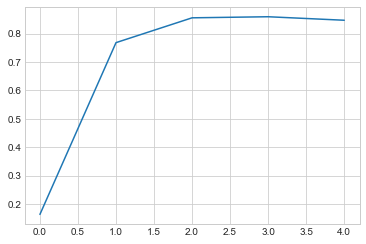

In [119]:
plt.plot(mean_c)

plt.show()

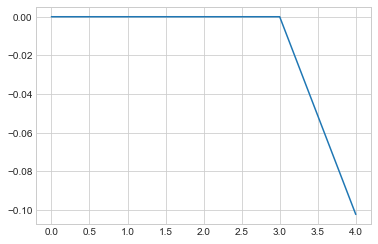

In [120]:
plt.plot(mean_d)

plt.show()